# Logistic Regression with MNIST

* [참고: TensorFlow.org](https://www.tensorflow.org/get_started/mnist/beginners)
* [소스: mnist_softmax.py in verion 1.4](https://github.com/tensorflow/tensorflow/blob/r1.4/tensorflow/examples/tutorials/mnist/mnist_softmax.py)

### Import modules

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners in version 1.4
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

np.random.seed(219)
tf.set_random_seed(219)

### Import data

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 784)
train_labels = np.asarray(train_labels, dtype=np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 784)
test_labels = np.asarray(test_labels, dtype=np.int32)

In [3]:
print(train_data.shape)

(60000, 784)


In [4]:
print(train_labels.shape)

(60000,)


In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8])

### Show the MNIST

label = 0


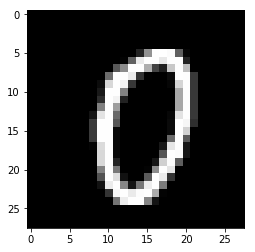

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = 1000
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28), cmap='gray')
plt.show()

## Build a model

### Create placeholders for inputs and labels

In [7]:
# 여기를 직접 채워 넣으시면 됩니다.
# x, y는 배치 데이터를 받을 수 있는 placeholder
# X: inputs
x = tf.placeholder(tf.float32, [None, 784], name='x')
# y: labels
y = tf.placeholder(tf.int32, [None], name='y')

### Create weight and bias

In [8]:
# 여기를 직접 채워 넣으시면 됩니다.
# create Variables using `get_variable`
W = tf.get_variable(name='W', shape=[784,10], initializer=tf.random_normal_initializer())
b = tf.get_variable(name='b', shape=[10], initializer=tf.zeros_initializer())

### Build a model: $y = Wx + b$

In [9]:
# 여기를 직접 채워 넣으시면 됩니다.
y_pred = tf.matmul(x, W) + b

### Define loss function

* [`tf.nn.softmax_cross_entropy_with_logits_v2`](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2)
* [`tf.losses.softmax_cross_entropy`](https://www.tensorflow.org/api_docs/python/tf/losses/softmax_cross_entropy)

In [10]:
# 출처: TensorFlow 공식 문서
# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y * tf.log(tf.nn.softmax(y_pred)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
y_one_hot = tf.one_hot(y, 10)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Create a optimizer

In [11]:
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### `tf.Session()` and train

In [12]:
start_time = time.time()
batch_size = 32

sess = tf.Session(config=sess_config)
sess.run(tf.global_variables_initializer())

num_batches_per_epoch = int(len(train_data) / batch_size)
print("num_batches_per_epoch {}".format(num_batches_per_epoch))

max_epochs = 10 # Train for only ten epochs
start_time = time.time()
losses = []
for epoch in range(max_epochs):
  # 여기를 직접 채워 넣으시면 됩니다.
  
  batch_index = 0
  for step in range(num_batches_per_epoch):
    # 여기를 직접 채워 넣으시면 됩니다.
    # train_data, train_labels의 인덱스를 잘 설정해보세요.
    batch_xs = train_data[step*batch_size:(step+1)*batch_size]
    batch_ys = train_labels[step*batch_size:(step+1)*batch_size]
    _, loss = sess.run([train_op, cross_entropy],
                       feed_dict={x: batch_xs, y: batch_ys})
    losses.append(loss)
  
    #if step % 100 == 0:
    #  print("step: %d, loss: %g" % (step, loss))
    
print('training done!')
print("Elapsed time: {}".format(time.time() - start_time))

num_batches_per_epoch 1875
training done!
Elapsed time: 19.202925205230713


### Plot the loss funtion

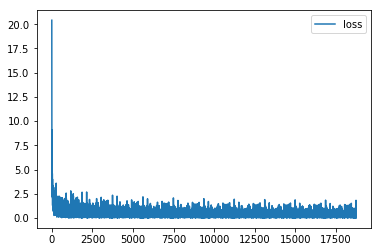

In [13]:
plt.plot(losses, label='loss')
plt.legend()
plt.show()

### Test trained model

* test accuracy: 0.8579

In [14]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: test_data,
                                    y: test_labels}))

0.9087


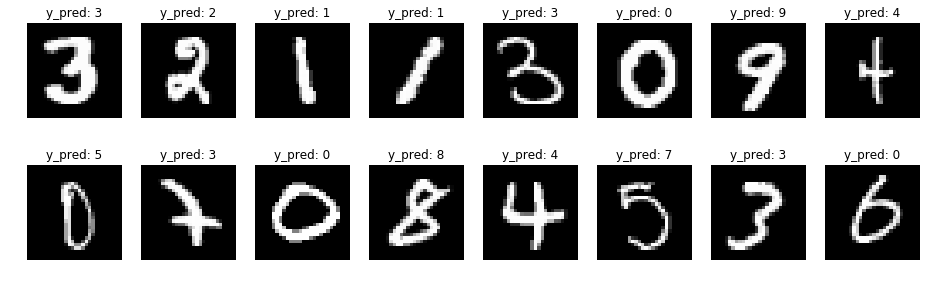

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)
batch_xs = test_data[batch_index]
y_pred_ = sess.run(y_pred, feed_dict={x: batch_xs})

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  p.set_title("y_pred: {}".format(np.argmax(py)))
  p.imshow(px.reshape(28, 28), cmap='gray')
  p.axis('off')

## 직접 실습

* 여러가지 hyper-parameter들을 바꿔가면서 accuracy를 높혀보자